In [5]:
#Import libraries
import thinkdsp as thinkDSP  #Digital Signal Processing Library
import thinkplot
import matplotlib
import numpy as np
from peakdetect import *
import os
import glob

In [6]:
#Function which preprocesses 8ibit audio file
#1. Form spectrum of Audio file
#2. Apply High pass filter with cutoff 100
#4. Make spectrogram with 4096 as frame rate
#5. For each frame find the maximum amplitude and corresponding frequency
#6. Store final .npy file
def preprocessA(sample):
    signal = thinkDSP.read_wave(sample)
    spectrum = signal.make_spectrum()
    spectrum.high_pass(cutoff=100, factor=0.1)
    signal = spectrum.make_wave()
    #signal.write("outcome.wav")
    spectrogram = signal.make_spectrogram(seg_length=4096)
    specMatrix = spectrogram.plot(returnArray=1,length=None,high=8000, cmap="gray")
    #thinkplot.show()
    maxi = np.amax(specMatrix,axis = 0)
    indi = np.argmax(specMatrix,axis = 0)
    final = np.column_stack([maxi,indi])
    print(os.getcwd())
    np.save(sample,final)

/home/apurv/Downloads/BirdSoundRecognition-master/shining_final
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Mourning_Dove1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Common_Whitethroat1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Common_Whitethroat1
/home/apurv/Downloads/BirdSoundRecognition-master/shining_final/Common_Whitethroat1
/home/apurv/Downloads/BirdSoundRecognition-master/sh

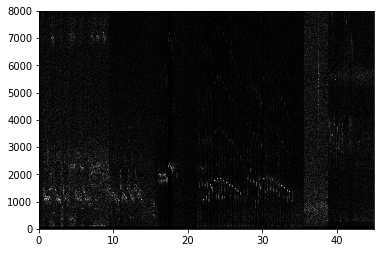

In [3]:
#Iterate through all the audio files and create .npy files
#top_dir = os.getcwd()
new_top_dir = "/home/apurv/Desktop/Term_Project/wav_files_8bitDepth"
os.chdir(new_top_dir)
print(new_top_dir)
for folder in os.listdir(new_top_dir):
    os.chdir(os.getcwd()+"/"+folder)
    for file in os.listdir(os.getcwd()):
        preprocessA(file)
    os.chdir(new_top_dir)
#os.chdir(top_dir)

In [7]:
#Divide training and test data set.
#Create one train file for each species.
import glob
f_dir = "/home/apurv/Desktop/Term_Project/wav_files_8bitDepth"
os.chdir(f_dir)
extension = ('*.npy')
#print(new_top_dir)
for folder in os.listdir(f_dir):
    os.chdir(os.getcwd()+"/"+folder)
    count=0
    for file in glob.glob(extension):
        #print(file)
        if count==0:
            arrayA=np.load(file)
        count+=1
    train=int(count*0.8)
    test=count-train
    n=0
    for file in glob.glob(extension):
        if n==0:
            n+=1
            continue
        if n < train:
            n+=1
            arrayB=np.load(file)
            arrayA=np.concatenate((arrayA,arrayB))
        else:
            arrayC=np.load(file)
            os.chdir('/home/apurv/Desktop/Term_Project/testing')
            np.save(folder+str(n),arrayC)
            os.chdir('/home/apurv/Desktop/Term_Project/wav_files_8bitDepth/'+folder)
            n+=1
    os.chdir('/home/apurv/Desktop/Term_Project/trained')
    np.save(folder+'_train',arrayA)
    #print(train,test)
    os.chdir(f_dir)